# 時系列解析の基礎

時系列解析向けに**Recurrent Neural Network**が有名ですが、まずは時系列データの取り扱いを含めて、習得していきましょう。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## データの取得

実データとして取得しやすい時系列データは `pandas-datareader` を使うと便利です。

In [2]:
from pandas_datareader.yahoo.daily import YahooDailyReader
import datetime

取得する最初の日と最後の日を決めておきます。

In [3]:
date_st = datetime.datetime(2014, 1, 1)
date_fn = datetime.datetime(2019,7,1)

yahooから、例えばMicrosoft(MSFT)の株価を取得してみましょう。
アメリカのサイトであるため、単位はドルとなっています。

In [4]:
df1 = YahooDailyReader('MSFT', date_st, date_fn).read()

取得できたデータを見てみましょう。

In [5]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,37.580002,37.220001,37.400002,37.410000,17503500.0,32.690006
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.471554
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.253098
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.571505
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.816179


また、複数の会社から取得する場合は、それぞれデータフレームを読み込み `pd.concat()` を使用して結合させます。

In [6]:
symbols = ['AAPL', 'MSFT', 'GOOGL']

In [7]:
dfs = [YahooDailyReader(symbol, date_st, date_fn).read() for symbol in symbols]

In [8]:
df2 = pd.concat(dfs, axis=0, keys=symbols).unstack(0)

In [9]:
df2.head()

High                               Low             \
                 AAPL       MSFT       GOOGL       AAPL       MSFT   
Date                                                                 
2013-12-31  80.182854  37.580002  561.061035  79.142860  37.220001   
2014-01-02  79.575714  37.400002  559.434448  78.860001  37.099998   
2014-01-03  79.099998  37.220001  559.024048  77.204285  36.599998   
2014-01-06  78.114288  36.889999  559.989990  76.228569  36.110001   
2014-01-07  77.994286  36.490002  570.415405  76.845711  36.209999   

                             Open                             Close  \
                 GOOGL       AAPL       MSFT       GOOGL       AAPL   
Date                                                                  
2013-12-31  553.683655  79.167145  37.400002  556.676697  80.145714   
2014-01-02  554.684692  79.382858  37.349998  558.288269  79.018570   
2014-01-03  553.018005  78.980003  37.200001  558.058044  77.282860   
2014-01-06  553.773804  76.778572  36.849998  557.062073  77.704285   
2014-01-07  561.141113  77.760002  36.330002  563.063049  77.148575   

                                        Volume                         \
                 MSFT       GOOGL         AAPL        MSFT      GOOGL   
Date                                                                    
2013-12-31  37.410000  560.915894   55771100.0  17503500.0  2713000.0   
2014-01-02  37.160000  557.117126   58671200.0  30632200.0  3639100.0   
2014-01-03  36.910000  553.053040   98116900.0  31134800.0  3330000.0   
2014-01-06  36.130001  559.219238  103152700.0  43603700.0  3535000.0   
2014-01-07  36.410000  570.000000   79302300.0  35802800.0  5100000.0   

            Adj Close                         
                 AAPL       MSFT       GOOGL  
Date                                          
2013-12-31  72.121513  32.690006  560.915894  
2014-01-02  71.107201  32.471554  557.117126  
2014-01-03  69.545288  32.253098  553.053040  
2014-01-06  69.924515  31.571505  559.219238  
2014-01-07  69.424438  31.816179  570.000000

In [10]:
df2.tail()

High                                  Low              \
                  AAPL        MSFT        GOOGL        AAPL        MSFT   
Date                                                                      
2019-06-25  199.259995  137.589996  1115.699951  195.289993  132.729996   
2019-06-26  200.990005  135.740005  1095.119995  197.350006  133.600006   
2019-06-27  201.570007  134.710007  1088.459961  199.570007  133.509995   
2019-06-28  199.500000  134.600006  1082.800049  197.050003  133.160004   
2019-07-01  204.490005  136.699997  1108.589966  200.649994  134.970001   

                               Open                                Close  \
                  GOOGL        AAPL        MSFT        GOOGL        AAPL   
Date                                                                       
2019-06-25  1084.599976  198.429993  137.250000  1115.079956  195.570007   
2019-06-26  1073.689941  197.770004  134.350006  1091.000000  199.800003   
2019-06-27  1075.849976  200.289993  134.139999  1086.750000  199.740005   
2019-06-28  1073.800049  198.679993  134.570007  1077.229980  197.919998   
2019-07-01  1095.329956  203.169998  136.630005  1101.040039  201.550003   

                                         Volume                         \
                  MSFT        GOOGL        AAPL        MSFT      GOOGL   
Date                                                                     
2019-06-25  133.429993  1087.579956  21070300.0  33327400.0  1582200.0   
2019-06-26  133.929993  1080.319946  26067500.0  23657700.0  1734900.0   
2019-06-27  134.149994  1076.630005  20899700.0  16557500.0  1203900.0   
2019-06-28  133.960007  1082.800049  31110600.0  30043000.0  1683600.0   
2019-07-01  135.679993  1100.000000  27316700.0  22654200.0  1459800.0   

             Adj Close                           
                  AAPL        MSFT        GOOGL  
Date                                             
2019-06-25  194.246582  132.536163  1087.579956  
2019-06-26  198.447952  133.032822  1080.319946  
2019-06-27  198.388367  133.251343  1076.630005  
2019-06-28  196.580658  133.062622  1082.800049  
2019-07-01  200.186111  134.771103  1100.000000

こちらのように、先頭（`.head`）の5件では確認できなかったため、末尾（`.tail`）の５件を表示することで確認できます。

## 時系列データのプロット

PandasのDataFrame型で定義されている場合、簡単にプロットすることができます。

In [11]:
type(df2)

pandas.core.frame.DataFrame

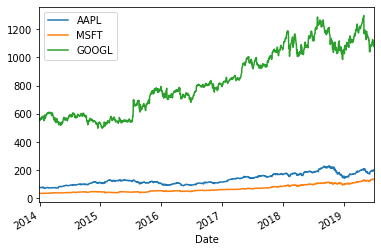

In [12]:
# 終値（Close）を可視化
df2['Close'].plot()

## トレンド抽出
Facebookが公開しているProphetという時系列解析向けのライブラリを使用します。
こちらは非常に手軽にトレンドの抽出や未来の値を予測できるため、まず簡単に使用するのであればこちらがおすすめです。

In [13]:
from fbprophet import Prophet

In [14]:
model = Prophet()

In [15]:
df1.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,37.580002,37.220001,37.400002,37.41,17503500.0,32.690006
2014-01-02,37.400002,37.099998,37.349998,37.16,30632200.0,32.471554
2014-01-03,37.220001,36.599998,37.200001,36.91,31134800.0,32.253098


In [16]:
df1.reset_index().head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-12-31,37.580002,37.220001,37.400002,37.41,17503500.0,32.690006
1,2014-01-02,37.400002,37.099998,37.349998,37.16,30632200.0,32.471554
2,2014-01-03,37.220001,36.599998,37.200001,36.91,31134800.0,32.253098


In [17]:
data = df1.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
data.head(3)

,ds,High,Low,Open,y,Volume,Adj Close
0,2013-12-31,37.580002,37.220001,37.400002,37.41,17503500.0,32.690006
1,2014-01-02,37.400002,37.099998,37.349998,37.16,30632200.0,32.471554
2,2014-01-03,37.220001,36.599998,37.200001,36.91,31134800.0,32.253098


In [18]:
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = model.make_future_dataframe(periods=365)

In [20]:
forecast = model.predict(future)

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-12-31,41.857780,34.362387,40.066956,41.857780,41.857780,-4.582490,-4.582490,-4.582490,1.025269,1.025269,1.025269,-5.607758,-5.607758,-5.607758,0.0,0.0,0.0,37.275291
1,2014-01-02,41.805823,34.270505,39.622047,41.805823,41.805823,-4.743177,-4.743177,-4.743177,0.996081,0.996081,0.996081,-5.739258,-5.739258,-5.739258,0.0,0.0,0.0,37.062646
2,2014-01-03,41.779844,34.328377,39.910786,41.779844,41.779844,-4.684596,-4.684596,-4.684596,1.092374,1.092374,1.092374,-5.776970,-5.776970,-5.776970,0.0,0.0,0.0,37.095249
3,2014-01-06,41.701908,34.065661,39.776060,41.701908,41.701908,-4.834598,-4.834598,-4.834598,0.952604,0.952604,0.952604,-5.787202,-5.787202,-5.787202,0.0,0.0,0.0,36.867310
4,2014-01-07,41.675929,34.130947,39.857514,41.675929,41.675929,-4.735842,-4.735842,-4.735842,1.025269,1.025269,1.025269,-5.761111,-5.761111,-5.761111,0.0,0.0,0.0,36.940087


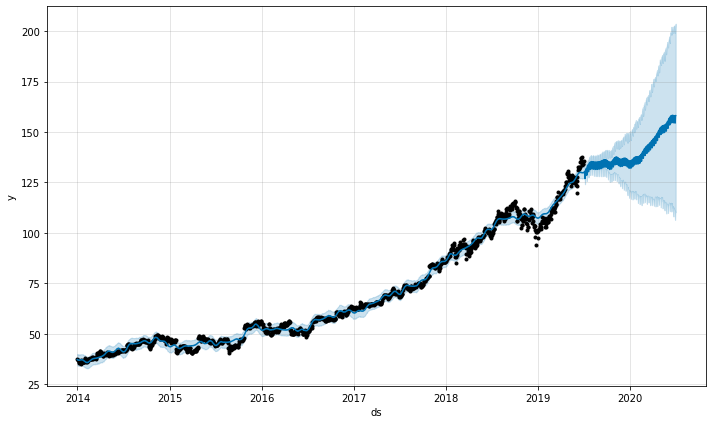

In [22]:
model.plot(forecast)
plt.show()

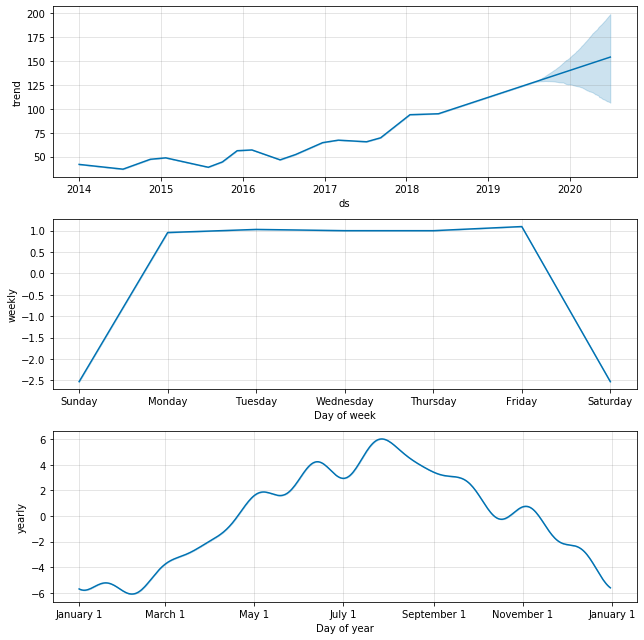

In [23]:
# トレンド性と周期性の抽出
model.plot_components(forecast)
plt.show()